In [12]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

# Lecture 23 #

## Percentiles ##

In [13]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [14]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

In [15]:
# Step 2. Figure out where 55th percentile would be.

In [16]:
np.arange(1, 7)/6

array([ 0.16666667,  0.33333333,  0.5       ,  0.66666667,  0.83333333,
        1.        ])

In [17]:
np.sort(x).item(3)

34

In [18]:
# Alternatively: One line of code
percentile(55, x)

34

## Discussion Question

In [19]:
s = make_array(1, 3, 5, 7, 9)

In [20]:
percentile(10, s) == 0

False

In [21]:
percentile(39, s) == percentile(40, s)

True

In [22]:
percentile(40, s) == percentile(41, s)

False

In [23]:
percentile(50, s) == 5

True

## Inference: Estimation

In [24]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [25]:
# Who made the most money
sf.sort('Total Compensation', descending=True).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235


In [26]:
# Who made the least money
sf.sort('Total Compensation', descending=False).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0


In [43]:
# $18/hr, 20 hr/wk, 52 weeks

min_salary = 18 * 20 * 52
sf = sf.where('Salary', are.above(min_salary))

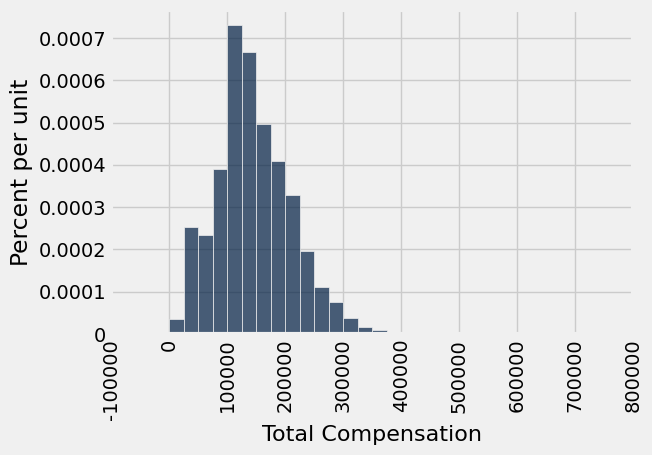

In [28]:
# Population Distribution

sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

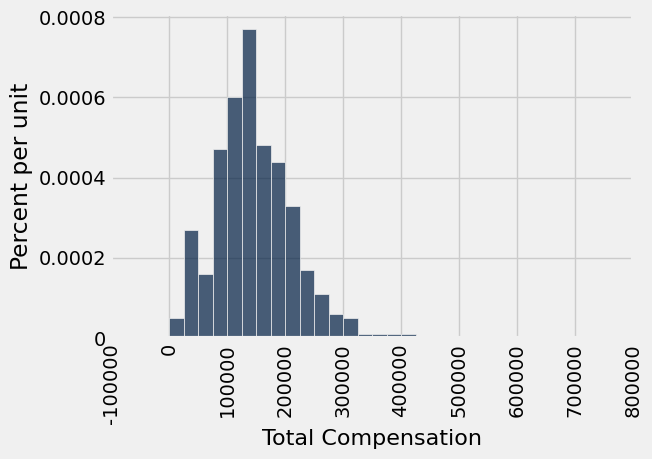

In [29]:
# An Empirical Distribution

our_sample = sf.sample(400, with_replacement=False)
our_sample.hist('Total Compensation', bins=sf_bins)

In [30]:
# Parameter: Median Total Compensation 

pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

137509.0

In [31]:
# Estimate: Median of a Sample

percentile(50, our_sample.column('Total Compensation'))

139844.0

But in the real world we won't be able to keep going back to the population. How to generate a new random sample *without going back to the population?*

## Variability of the Estimate

In [32]:
def generate_sample_median(samp_size):
    new_sample = sf.sample(samp_size, with_replacement=False)
    return percentile(50, new_sample.column('Total Compensation'))

In [33]:
generate_sample_median(400)

133232.0

## Quantifying Uncertainty

In [34]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(400)
    sample_medians = np.append(sample_medians, new_median)

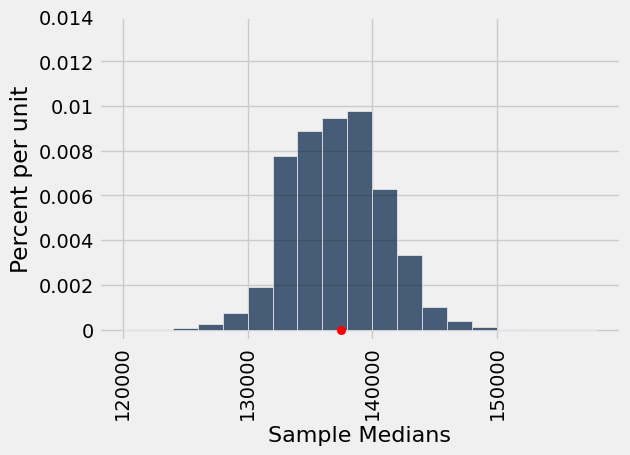

In [35]:
med_bins = np.arange(120000, 160000, 2000)
Table().with_column('Sample Medians', sample_medians).hist(bins=med_bins)

plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color='red');

# Bootstrap

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

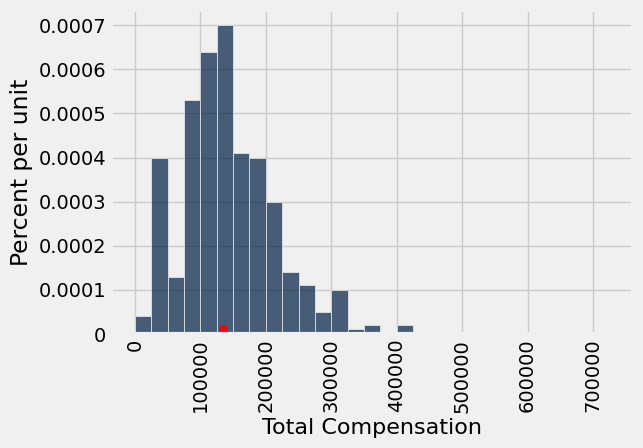

In [36]:
# Default behavior of tbl.sample:
# at random with replacement,
# the same number of times as rows of tbl

bootstrap_sample = our_sample.sample()
bootstrap_sample.hist('Total Compensation', bins=sf_bins)
samp_median = percentile(50, bootstrap_sample.column('Total Compensation'))

plots.scatter(samp_median, 0.0000001, color='red');

In [37]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = our_sample.sample()
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [38]:
one_bootstrap_median()

140686.0

In [39]:
# Generate the medians of 1000 bootstrap samples
num_repetitions = 1000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

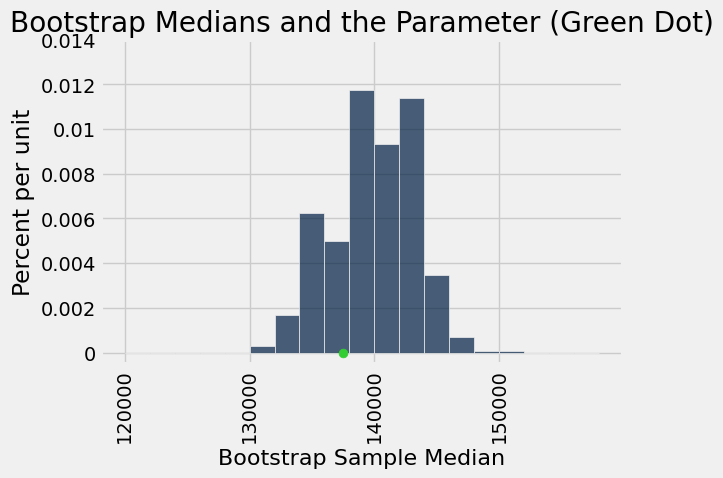

In [40]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates 

In [44]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([ 133479.,  145698.])

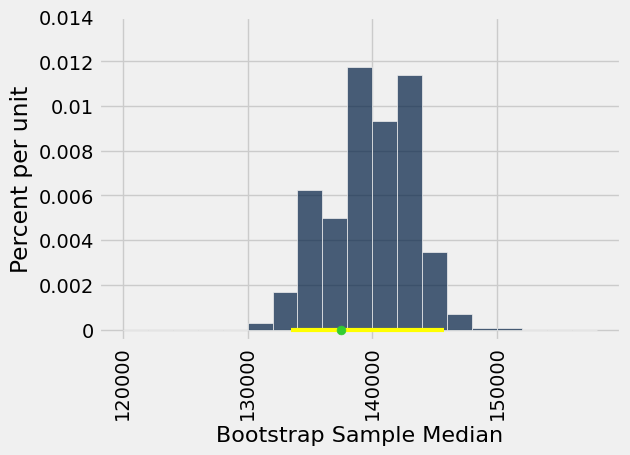

In [42]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);